# 2023-01-17 Exam

### General Instructions:

Welcome to the **Python Programming (for Data Science)** exam session! Please, read **carefully** the instructions below before start writing code. 
This session will last **75 minutes** (plus any additional time gained during the first part of the exam) and is worth 33 points.

You will earn all of the points associated to an exercise **if and only if** the answer you provide passes successfully **all** the tests for that exercise (both those that are visible and those that are hidden to you). Some exercises do not have a set of predefined tests and will be evaulated line by line.<br />

To actually write down your implementation, make sure to fill in any place that says <code style="color:green">**_# YOUR CODE HERE_**</code>. Note also that you should **either comment or delete** any <code style="color:green">**raise NotImplementedError()**</code> exception.<br />

For this exam session **you will not be allowed** to use any lecture material yet you will be able to access the following APIs:

-  [Python](https://docs.python.org/)
-  [Numpy](https://numpy.org/)
-  [Scipy](https://docs.scipy.org/)
-  [Pandas](https://pandas.pydata.org/)
-  [Matplotlib](https://matplotlib.org/)
-  [Seaborn](http://seaborn.pydata.org/)
-  [SciKit-Learn](http://scikit-learn.org/stable/)

Once you are done, save this notebook and rename it as follows:

<code>**YOURUSERNAME_2023-01-17.ipynb**</code>

where <code>**YOURUSERNAME**</code> is your actual username. To be consistent, we are expecting your username to be composed by your first name's initial, followed by your full lastname.<br />

Finally, go back to [Moodle](https://esami.elearning.unipd.it/), you will be able to upload your notebook file for grading.

Note that there is no limit on the number of submissions; however, be careful when you upload a new version of this notebook because each submission overwrites the previous one. 
The due date indicated above is **strict**; after that, the system will not accept any more submissions and the latest uploaded notebook will be the one considered for grading.

The archive you have downloaded (<code style="color:magenta">**20230117_midterm.zip**</code>) is organized as follows:

<code style="color:red">**20230117_mideterm**</code> (root)<br />
|----<code style="color:green">**20230117.ipynb**</code> (_this_ notebook)<br />
|----<code>**dataset.csv**</code> (the dataset you will be using for answering data science related questions)<br />
|----<code>**factbook.db**</code> (the sqlite database of the CIA factbook)<br />
|----<code>**factbook.sql**</code> (the sql code that was used to create the table contained in the factbook.db)<br />
|----<code>**README.txt**</code> (a description of the dataset.csv file)

<center><h3>... Now, sit back, relax, and do your best!</h3></center>

**First Name** = Your _first name_ here

**Last Name** = Your _last name_ here

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Adding the following line, allows Jupyter Notebook to visualize plots
# produced by matplotlib directly below the code cell which generated those.
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
from nose.tools import assert_equal
from operator import itemgetter

EPSILON = .0000001 # tiny tolerance for managing subtle differences resulting from floating point operations

DATASET_FILE = "dataset.csv"

## Exercise 1 (2 point)

In this part, you will be working with the dataset file <code>**dataset.csv**</code>. For a complete description of this data source, please refer to the <code>**README.txt**</code>.
In a nutshell, this is a sample of **1,000 instances** from a larger dataset containing census and demographic information for a set of citizens.
Each citizen (i.e., row in the file) is described by **14** features (i.e., columns) and labeled with an binary value (i.e., the 15th and last column called <code>**income_greater_than_50k**</code>), which takes on two values: **-1** (indicating the citizen's yearly income is **below or equal than** 50k dollars) or **+1**, otherwise.<br />
The cell below is responsible for correctly loading the dataset from the <code>**dataset.csv**</code> file. 

In [2]:
# Load the dataset stored at `DATASET_FILE` in a variable named "data", 
# use "," as field separator and '?' to detect NAs

data = pd.read_csv(DATASET_FILE, 
                   sep=",", 
                   na_values='?')
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_greater_than_50k
0,49,Private,153536,Some-college,10,Divorced,Prof-specialty,Not-in-family,White,Male,14084,0,44,United-States,1
1,19,Private,417657,HS-grad,9,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,50,United-States,-1
2,41,Private,143046,Masters,14,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,-1
3,46,Private,377401,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,1902,70,Canada,1
4,40,Private,224232,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,1


## Exercise 2 (3 point)

Implement the function <code>**avg_capital_gain_per_age**</code> below. This takes as input a <code>**pandas.DataFrame**</code> object and an integer value <code>**age**</code>, and returns the **average** value of <code>**capital_gain**</code> of citizens having that age.

(**NOTE:** If the information abuot age is missing in a record, the <code>**mean()**</code> function is robust and returns <code>**np.nan**</code>)

In [3]:
def avg_capital_gain_per_age(dataframe, age):
    """
    Return the average value of capital gain for citizens having a specific age.
    """
    return dataframe[dataframe.age == age]['capital_gain'].mean()
    #return np.mean(dataframe[dataframe.age == age]['capital_gain'])

In [4]:
"""
Test the correctness of the implementation of the `avg_capital_gain_per_age` function
"""

assert_equal(True, np.abs(192.80769230769232 - avg_capital_gain_per_age(data, 32)) < EPSILON)
assert_equal(0.0, avg_capital_gain_per_age(data, 27))
assert_equal(2330.0, avg_capital_gain_per_age(data, 48))

## Exercise 3 (4 point)

Implement the function <code>**hours_per_week_stats**</code> below. This takes as input a <code>**pandas.DataFrame**</code> object and returns a tuple containing the min, max, avg, and median value of <code>**hours_per_week**</code>, yet computed on a _slice_ of the input <code>**pandas.DataFrame**</code>.<br />
The sliced dataset represents the subpopulation containing **female** citizens whose age is **between 36 and 49 years old** (extremes included), who were born in the **United-States** and having a value of <code>**education_num**</code> **strictly greater than** the _overall_ average.

In [8]:
def hours_per_week_stats(dataframe):
    """
    Return a tuple containing the min, max, avg, and median value of `hours_per_week` feature,
    yet limited to a slice of the input DataFrame (data). 
    In particular, this slice will contain instances referring to female citizens
    whose age is between 36 and 49 (extremes included) born in the United-States
    and having a value of education_num strictly above the overall population average.
    """
    sliced = dataframe[(dataframe.age >= 36) & 
                  (dataframe.age <=49) & 
                  (dataframe.native_country=='United-States') &
                  (dataframe.sex=='Female') &
                  (dataframe.education_num > dataframe.education_num.mean())
                 ]
    return (
        sliced['hours_per_week'].min(),
        sliced['hours_per_week'].max(),
        sliced['hours_per_week'].mean(),
        sliced['hours_per_week'].median(),
    )

hours_per_week_stats(data)

(5, 60, 38.96666666666667, 40.0)

In [9]:
"""
Test the correctness of the implementation of the `hours_per_week_stats` function
"""

# Call off `hours_per_week_stats` function
stats = hours_per_week_stats(data)

assert_equal(5, stats[0])
assert_equal(60, stats[1])

## Exercise 4 (4 points)

Implement the function <code>**standardize_dataset**</code>, which takes as input a <code>**pandas.DataFrame**</code> object and modifies it by creating **new** columns corresponding to the **standardized** values of _numerical_ columns only, except for the target column, i.e., the very last column named <code>**income_greater_than_50k**</code>.<br />
To standardize a column $X$, each original value $x\in X$ should be modified with $x_{\text{std}}$ as follows:

$$
x_{\text{std}} = \frac{x - \mu_X}{\sigma_X}
$$

where $\mu_X$ and $\sigma_X$ are the **mean** and **standard deviation** computed across $X$, respectively.

To be sure standardization is applied to a numerical column only, you can use the following built-in function:

<code>**pd.api.types.infer_dtype(data[column], skipna=True)**</code>.

If the value returned by this function is equal to the string <code>**'integer'**</code>, then you can apply the standardization.

Finally, the naming convention for standardized columns is as follows: if <code>**column**</code> is the name of the original column, then its standardized version will be <code>**column_std**</code>.

In [10]:
def standardize_dataset(data):
    cols = data.columns[:-1]
    for col in cols:
        if pd.api.types.infer_dtype(data[col], skipna=True) == 'integer':
            data[col + '_std'] = (data[col] - data[col].mean()) / data[col].std()
    return data

In [11]:
"""
Test the correctness of the implementation of the `standardize_dataset` function
"""

# Call off `standardize_dataset` function on a copy of our original dataset
data_cpy = data.copy()
standardize_dataset(data_cpy)

assert_equal(1000, data_cpy.shape[0])
assert_equal(21, data_cpy.shape[1])
assert_equal(True, np.abs(0.093258105603949315 - data_cpy.iloc[42]['age_std']) < EPSILON)
assert_equal(True, np.abs(-0.21956059890921917 - data_cpy.iloc[73]['capital_loss_std']) < EPSILON)

## Exercise 5 (4 point)

Connect to the CIA Factbook database factbook.db and use an SQL query to select all the data contained in the table *facts*. Build a pandas DataFrame with the result set in a varibale named *countries*.


In [12]:
import sqlite3

# Connect to the database "factbook.db" and read all the rows in the table "facts".
conn = sqlite3.connect('factbook.db')

# query
query = "SELECT * FROM facts;"

countries = pd.read_sql(query, conn)

conn.close()

print(countries.head())

   id code         name       area  area_land  area_water  population  \
0   1   af  Afghanistan   652230.0   652230.0         0.0  32564342.0   
1   2   al      Albania    28748.0    27398.0      1350.0   3029278.0   
2   3   ag      Algeria  2381741.0  2381741.0         0.0  39542166.0   
3   4   an      Andorra      468.0      468.0         0.0     85580.0   
4   5   ao       Angola  1246700.0  1246700.0         0.0  19625353.0   

   population_growth  birth_rate  death_rate  migration_rate  \
0               2.32       38.57       13.89            1.51   
1               0.30       12.92        6.58            3.30   
2               1.84       23.67        4.31            0.92   
3               0.12        8.13        6.96            0.00   
4               2.78       38.78       11.49            0.46   

                   created_at                  updated_at  
0  2015-11-01 13:19:49.461734  2015-11-01 13:19:49.461734  
1  2015-11-01 13:19:54.431082  2015-11-01 13:19:54.43108

## Exercise 6 (4 point)

Merge the dataframe *data* created in exercise 1 and the dataframe *countries* built in the previous exercise using the columns *native_country* and *name*, respectvely. Save the result in a new dataframe names *data_ext*.

In [16]:
# YOUR CODE HERE
raise NotImplementedError()


NotImplementedError: 

In [17]:
# YOUR CODE HERE
data_ext = pd.merge(data, countries, left_on = "native_country", right_on = "name")

In [19]:
"""
Test the correctness of `dist_plot_age`, `mu` and `sigma`
"""

assert_equal(True, (data_ext.shape[0] == 56))


## Exercise 7 (3 point)

Split the *data_ext* dataframe into two dataframes using the "masking" approach. One dataframe, named "lower", must contain the rows of *data_ext* that have a population lower than the mean of the population of the dataframe *countries*; the other dataframe, named "gr_eq", must contain the rows of *data_ext* that have a population greater or equal than the mean of the population of the dataframe *countries*.


In [20]:
# YOUR CODE HERE
raise NotImplementedError()


## THERE IS NO TEST OF CORRECTNESS FOR THIS PART


NotImplementedError: 

In [21]:
print(data_ext["population"].median())

lower = data_ext[data_ext["population"] < countries["population"].mean()]
gr_eq = data_ext[data_ext["population"] >= countries["population"].mean()]

print(lower.shape)
print(gr_eq.shape)

81824270.0
(23, 28)
(33, 28)


## Exercise 8 (3 points)

Build a Figure object and create a 1 x 2 matrix of subplots.
In the first subplot you must plot the distribution of the numerical feature <code>**age**</code> of the subset of data of countries with a popoulation lower than the mean using the <code>**distplot**</code> function.
In the second subplot you must plot the distribution of the numerical feature <code>**age**</code> of the subset of data of countries with a popoulation greater or equal than the mean using the <code>**boxplot**</code> function.
Replace "?" with the appropriate code.


In [22]:
# Let's produce the boxplots corresponding to the required distribution plots 
# Create a Figure containing 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(10,12))

# YOUR CODE HERE (substitute "?" with the appropriate variable)
sns.boxplot(?, color='#808080', ax=axes[0,0])
sns.boxplot(?, color='#df2020', ax=axes[0,1])

## THERE IS NO TEST OF CORRECTNESS FOR THIS PART


SyntaxError: invalid syntax (3728727155.py, line 6)

In [23]:
# Let's produce the boxplots corresponding to the required distribution plots 
# Create a Figure containing 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(10,12))

# YOUR CODE HERE (substitute "?" with the appropriate variable)
sns.boxplot(x = ?, color='#808080', ax=axes[0,0])
sns.boxplot(x = ?, color='#df2020', ax=axes[0,1])

SyntaxError: invalid syntax (1420639765.py, line 6)

<AxesSubplot:xlabel='age'>

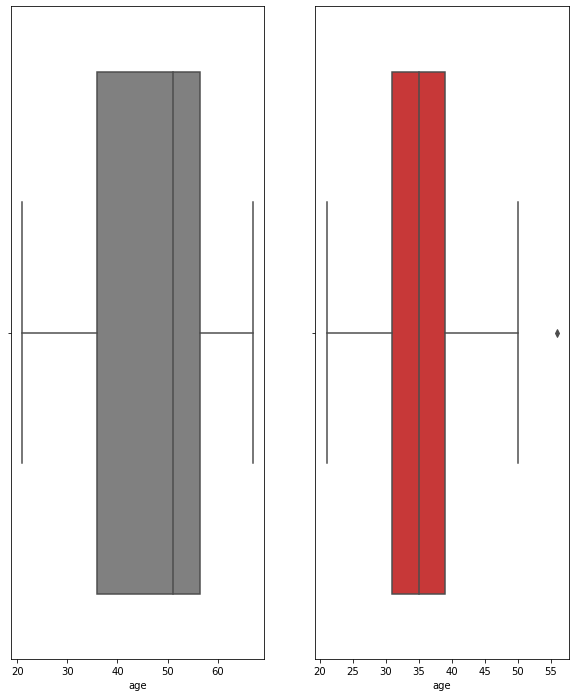

In [24]:
# Let's produce the boxplots corresponding to the required distribution plots 
# Create a Figure containing 2x2 subplots
fig, axes = plt.subplots(1, 2, figsize=(10,12))

# YOUR CODE HERE (substitute "?" with the appropriate variable)
sns.boxplot(x = lower.age, color='#808080', ax=axes[0])
sns.boxplot(x = gr_eq.age, color='#df2020', ax=axes[1])

# Machine Learning (6 points)

In this part, you will be able to show your machine learning skills! Use the scikit-learn package to import all the subpackages that you need. Please follow the structure indicated in the following steps to train a classifier of your choice. 

**The goal is to predict whether the income of a person is greater than 50k!**

In [25]:
"""
import the packages you need
"""

### YOUR CODE HERE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression

"""
Extract the feature matrix X from our original DataFrame (you can choose the columns).
"""

### YOUR CODE HERE
X = data.loc[:, ['age', 'education_num', 'hours_per_week']]   #just numerical variables considered for sake of simplicity


"""
Similarly, we want to extract the target class column vector y.
"""

### YOUR CODE HERE

y = data.iloc[:, -1]


"""
Use a simple stratified train/test split
"""
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 321, 
                                                    stratify = y)


print("Training Set shape: {}".format(X_train.shape))
print("Test Set shape: {}".format(X_test.shape))

Training Set shape: (800, 3)
Test Set shape: (200, 3)


## Train
Implement the following code to train a model of your choice.

In [30]:
# Create model object

### YOUR CODE HERE
model = RidgeClassifier()
# model = LogisticRegression()

# Fit the model to the training set
model.fit(X_train, y_train)

RidgeClassifier()

## Evaluate

Run the following code to implement a function which evaluates the effectiveness of your classifier.
This function has already been implemented.

In [28]:
"""
General function used to assess the quality of predictions
in terms of two scores: accuracy and ROC AUC (Area Under the ROC Curve)
"""
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

def evaluate(true_values, predicted_values):
    # Classification Accuracy
    print("Accuracy = {:.3f}".
          format(accuracy_score(true_values, predicted_values)))
    # Explained variance score: 1 is perfect prediction
    print("Area Under the ROC Curve (ROC AUC) = {:.3f}".
          format(roc_auc_score(true_values, predicted_values)))



Implement the following code to test your model.

In [31]:
# Assess the quality of predictions made on the test set
print("***** Evaluate Performance on Test Set *****") 

### YOUR CODE HERE
predicted_values = model.predict(X_test, )

evaluate(y_test, predicted_values)

***** Evaluate Performance on Test Set *****
Accuracy = 0.780
Area Under the ROC Curve (ROC AUC) = 0.607
